In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
paths = pd.read_csv('../../paths.csv', index_col=0)


In [3]:
embeddings = pd.read_csv(paths.loc["embeddings"].iloc[0] + "embeddings_cls.csv") # 23s

embeddings.head()

,bmi,age,eid,sex,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024
0,30.8012,69.1,1000071,0.0,0.009295,-0.050158,0.106136,-0.074978,-0.014191,-0.011741,...,0.006710,0.022628,-0.025037,0.035849,0.054865,0.046250,0.001940,-0.122577,0.029663,-0.008626
1,26.5036,75.0,1000109,0.0,0.008081,-0.048688,0.108506,-0.062822,-0.021515,-0.007106,...,0.013106,0.017039,-0.019046,0.038881,0.043792,0.047429,-0.004594,-0.120720,0.028851,-0.009449
2,NaN,NaN,1000125,NaN,0.004932,-0.061935,0.082816,-0.072351,-0.002664,-0.011788,...,-0.002268,0.028449,0.014348,0.043135,0.046699,0.017718,-0.004869,-0.097786,0.020660,-0.005567
3,32.6204,58.7,1000180,1.0,0.013318,-0.043398,0.090517,-0.053843,-0.004366,-0.004750,...,0.003498,0.027259,0.005642,0.033607,0.040237,0.053968,-0.011152,-0.114236,0.029537,-0.012125
4,24.6337,73.0,1000191,1.0,0.003529,-0.065143,0.090277,-0.061435,-0.004244,-0.017204,...,0.003006,0.027468,-0.008473,0.055798,0.065920,0.047568,-0.019216,-0.103217,0.028549,-0.014057


In [4]:
embeddings.shape

(73568, 1029)

In [10]:
healthy_data_train = pd.read_csv(paths.loc["healthy_train"].iloc[0])
healthy_data_train.shape

(2841, 12)

In [4]:
feature_cols = [f'feature_{i}' for i in range(1025)]

# 2m24s this takes a little while
correlations = embeddings[feature_cols + ['age']].corr()['age'].drop('age')

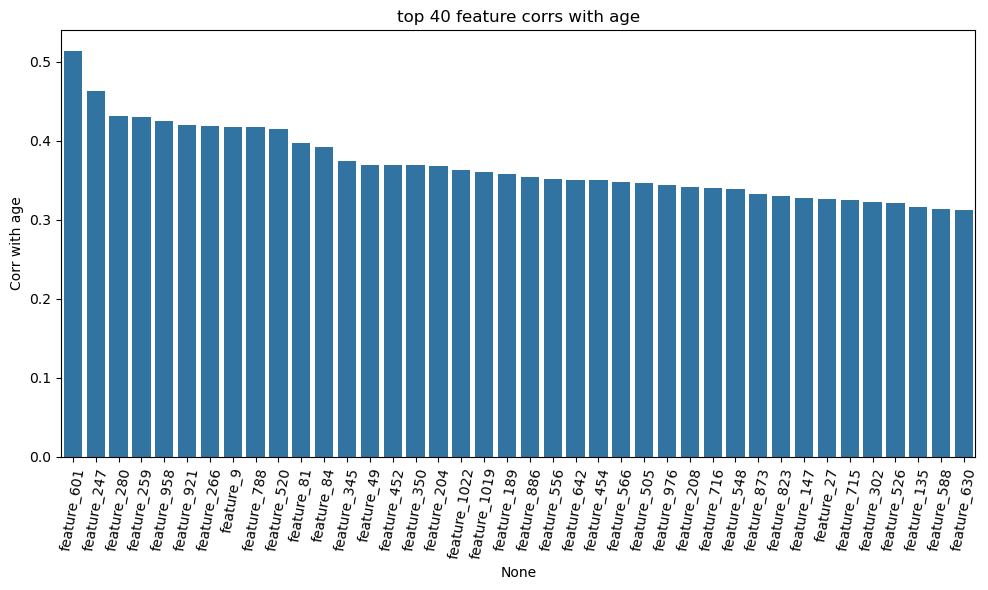

In [5]:
correlations_plot = correlations.abs().sort_values(ascending=False) #  negative correlations are also important

top_n = 40
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_plot.index[:top_n], y=correlations_plot.values[:top_n])
plt.xticks(rotation=80)
plt.title(f'top {top_n} feature corrs with age')
plt.ylabel('Corr with age')
plt.tight_layout()
plt.show()


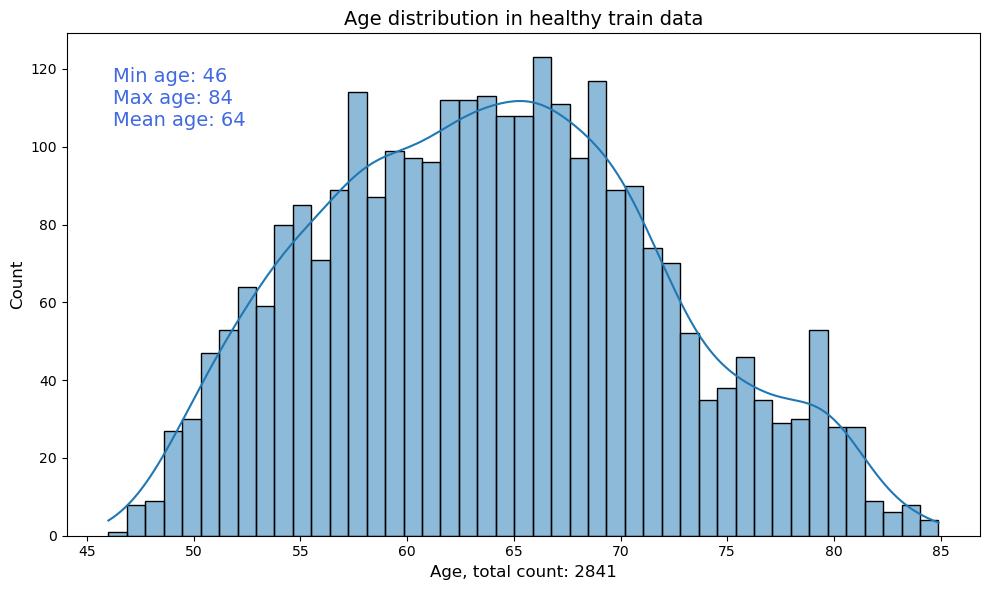

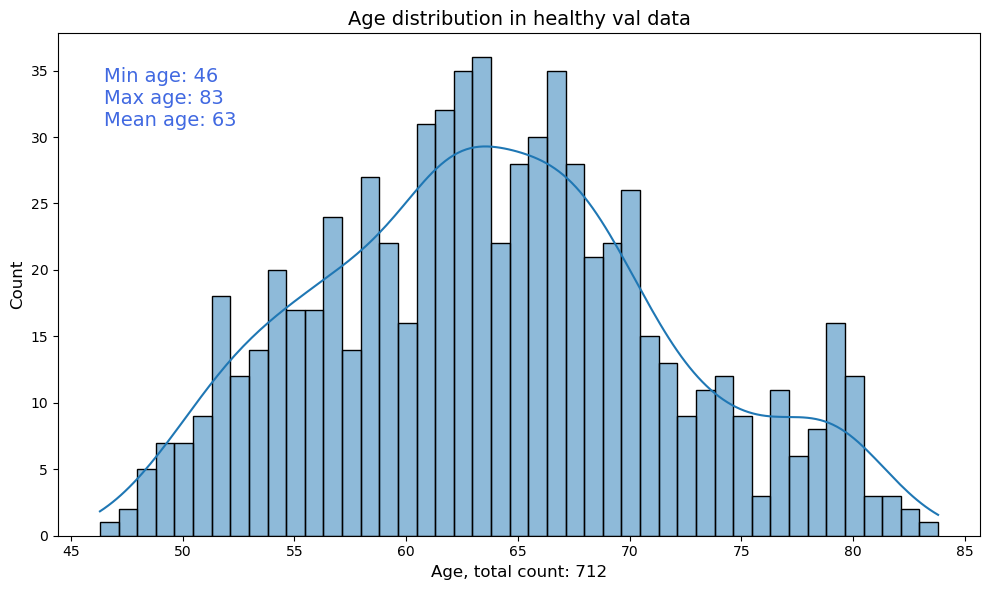

In [22]:
healthy_data_train = pd.read_csv(paths.loc["healthy_train"].iloc[0])
distinct_ages_t = healthy_data_train['age'].unique()
healthy_data_val = pd.read_csv(paths.loc["healthy_val"].iloc[0])
distinct_ages_v = healthy_data_val['age'].unique()

b_count = len(distinct_ages_t) // 8
healthy_data_train = healthy_data_train.dropna(subset=['age'])
healthy_data_val = healthy_data_val.dropna(subset=['age'])
#healthy_data_train['age'] = healthy_data_train['age'].astype(int)
#healthy_data_val['age'] = healthy_data_val['age'].astype(int)

# plot ages
plt.figure(figsize=(10, 6))
sns.histplot(healthy_data_train['age'], bins=b_count, kde=True)
plt.title('Age distribution in healthy train data', fontsize=14)
plt.xlabel(f'Age, total count: {len(healthy_data_train)}', fontsize=12)
plt.text(0.05, 0.87, f"Min age: {int(healthy_data_train['age'].min())}\nMax age: {int(healthy_data_train['age'].max())}\nMean age: {int(healthy_data_train['age'].mean())}",
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14, color='royalblue')
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(healthy_data_val['age'], bins=b_count, kde=True)
plt.title('Age distribution in healthy val data', fontsize=14)
plt.xlabel(f'Age, total count: {len(healthy_data_val)}', fontsize=12)
plt.text(0.05, 0.87, f"Min age: {int(healthy_data_val['age'].min())}\nMax age: {int(healthy_data_val['age'].max())}\nMean age: {int(healthy_data_val['age'].mean())}",
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14, color='royalblue')
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
three_year_data = pd.read_csv("/vol/miltank/projects/ukbb/projects/practical_ss25_icl/disease_filtered_data_3year/cancer_timerange_3year.csv")
four_year_data = pd.read_csv("/vol/miltank/projects/ukbb/projects/practical_ss25_icl/disease_filtered_data_4year/cancer_timerange_4year.csv")
five_year_data = pd.read_csv("/vol/miltank/projects/ukbb/projects/practical_ss25_icl/disease_filtered_data_5year/cancer_timerange_5year.csv")


three_year_data.head()

,eid,31-0.0,34-0.0,53-2.0,21001-2.0,height,50-2.0,50-0.0,icd10_code,icd10_date,icd9_code,icd9_date,self_reported_code,self_reported_date,time_to_event[days]
0,1013913,1,1942,2018-09-20,31.161400,169.0,169.0,170.0,C61,2021-02-09,NaN,NaN,NaN,NaN,873
1,1022358,1,1945,2016-07-26,24.685700,175.0,175.0,175.1,C349,2017-12-22,NaN,NaN,NaN,NaN,514
2,1029745,1,1943,2015-01-26,26.749800,169.0,169.0,167.0,C61,2017-06-05,NaN,NaN,NaN,NaN,861
3,1031875,0,1942,2019-11-18,30.700400,166.1,166.1,168.0,C343,2022-01-24,NaN,NaN,NaN,NaN,798
4,1037854,0,1952,2017-09-22,26.693434,154.0,NaN,154.0,C56,2018-04-03,NaN,NaN,NaN,NaN,193


In [5]:
unique_icd10_codes = three_year_data['icd10_code'].unique()
print(len(unique_icd10_codes))
unique_icd9_codes = three_year_data['icd9_code'].unique()
print(len(unique_icd9_codes))

icd10_codes_by_count = five_year_data['icd10_code'].value_counts()
print(icd10_codes_by_count)

176
1
icd10_code
C61     479
C509    115
C504     90
C187     57
C341     51
       ... 
D379      1
C150      1
C840      1
C962      1
C152      1
Name: count, Length: 200, dtype: int64


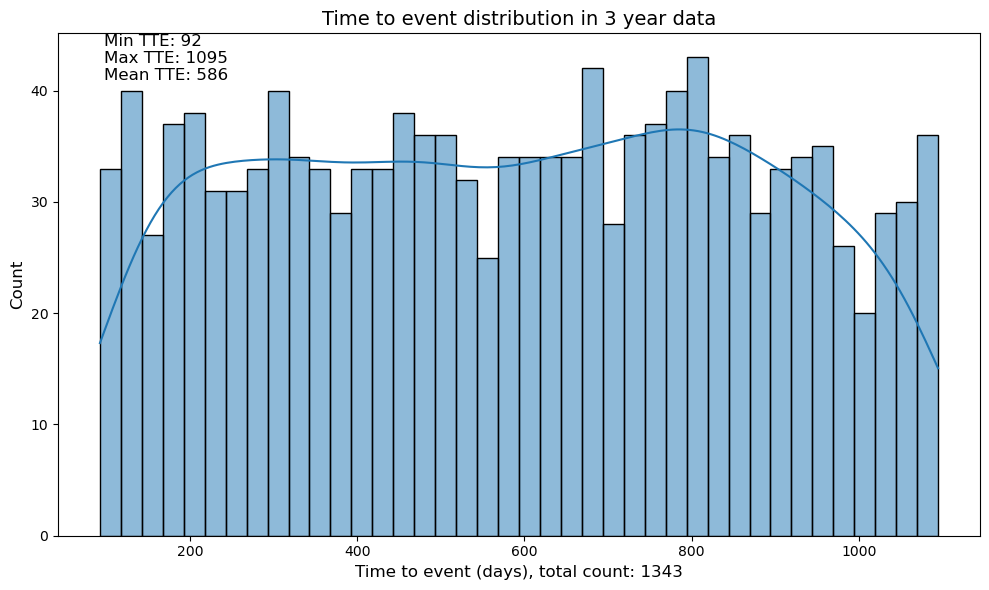

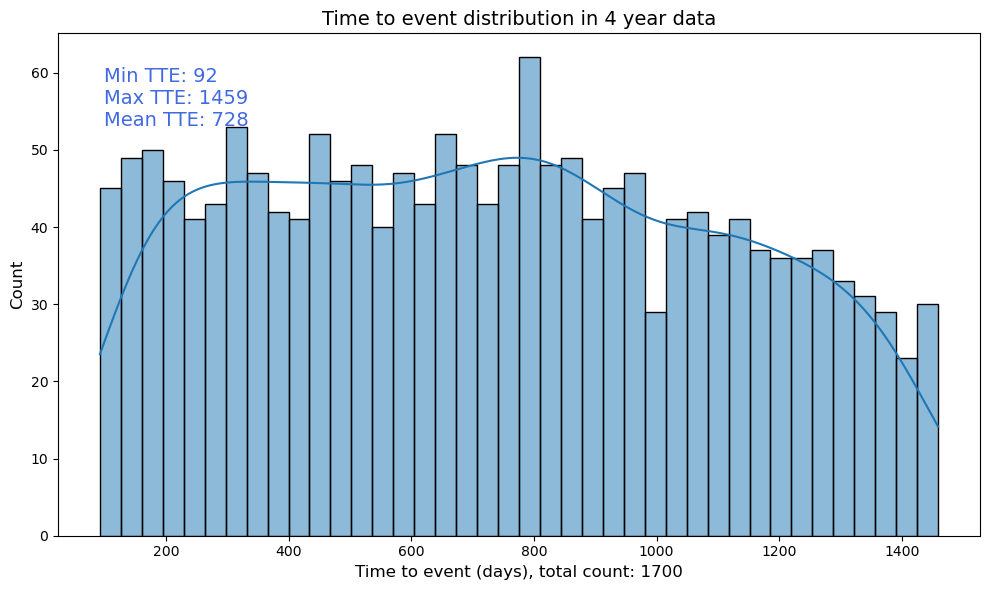

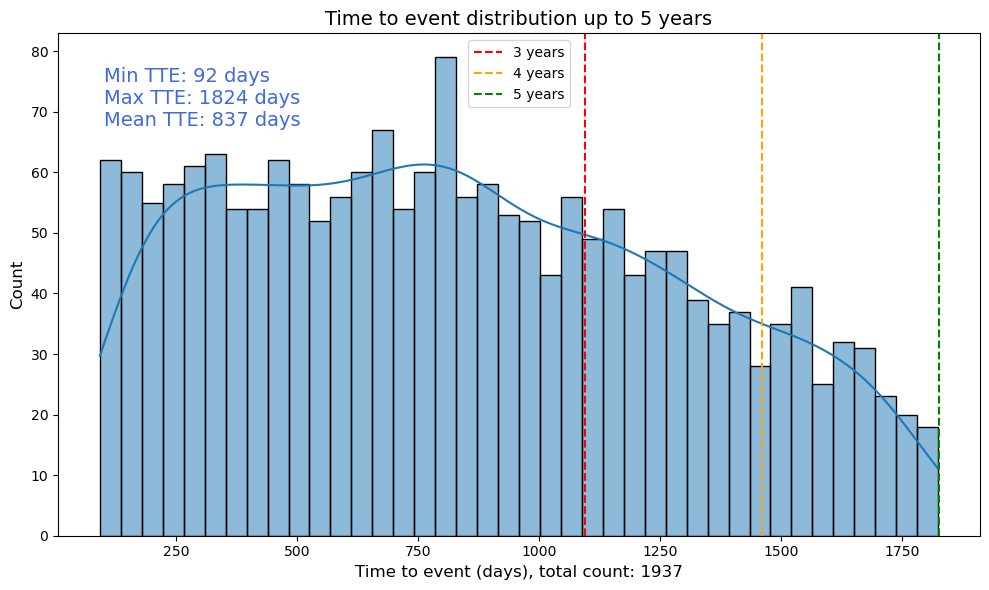

In [38]:
# plot time to event
plt.figure(figsize=(10, 6))
sns.histplot(three_year_data['time_to_event[days]'], bins=40, kde=True)
plt.title('Time to event distribution in 3 year data', fontsize=14)
plt.xlabel(f'Time to event (days), total count: {len(three_year_data)}', fontsize=12)
plt.text(0.05, 0.95, f"Min TTE: {int(three_year_data['time_to_event[days]'].min())}\nMax TTE: {int(three_year_data['time_to_event[days]'].max())}\nMean TTE: {int(three_year_data['time_to_event[days]'].mean())}",
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(four_year_data['time_to_event[days]'], bins=40, kde=True)
plt.title('Time to event distribution in 4 year data', fontsize=14)
plt.xlabel(f'Time to event (days), total count: {len(four_year_data)}', fontsize=12)
plt.text(0.05, 0.87, f"Min TTE: {int(four_year_data['time_to_event[days]'].min())}\nMax TTE: {int(four_year_data['time_to_event[days]'].max())}\nMean TTE: {int(four_year_data['time_to_event[days]'].mean())}",
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14, color='royalblue')
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(five_year_data['time_to_event[days]'], bins=40, kde=True)
plt.title('Time to event distribution up to 5 years', fontsize=14)
plt.xlabel(f'Time to event (days), total count: {len(five_year_data)}', fontsize=12)
plt.text(0.05, 0.87, f"Min TTE: {int(five_year_data['time_to_event[days]'].min())} days\nMax TTE: {int(five_year_data['time_to_event[days]'].max())} days\nMean TTE: {int(five_year_data['time_to_event[days]'].mean())} days",
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14, color='royalblue')
plt.ylabel('Count', fontsize=12)
# bar at 3, 4, 5 years
plt.axvline(x=3*365, color='red', linestyle='--', label='3 years')
plt.axvline(x=4*365, color='orange', linestyle='--', label='4 years')
plt.axvline(x=5*365, color='green', linestyle='--', label='5 years')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
radiomics_fat = pd.read_csv("../data/radiomics_fat.csv")
radiomics_fat.head(2)

/tmp/ipykernel_1310330/2225021983.py:1: DtypeWarning: Columns (7600,7601,7602,7603,7604,7605,7606,7607,7608,7609,7610,7611,7612,7613,7614,7615,7616,7617,7618,7619,7620,7621,7622,7623,7624,7625,7626,7627,7628,7629,7630,7631,7632,7633,7634,7635,7636,7637,7638,7639,7640,7641,7642,7643,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654,7655,7656,7657,7658,7659,7660,7661,7662,7663,7664,7665,7666,7667,7668,7669) have mixed types. Specify dtype option on import or set low_memory=False.
  radiomics_fat = pd.read_csv("../data/radiomics_fat.csv")


,spleen_shape_Elongation,spleen_shape_Flatness,spleen_shape_LeastAxisLength,spleen_shape_MajorAxisLength,spleen_shape_Maximum2DDiameterColumn,spleen_shape_Maximum2DDiameterRow,spleen_shape_Maximum2DDiameterSlice,spleen_shape_Maximum3DDiameter,spleen_shape_MeshVolume,spleen_shape_MinorAxisLength,...,iliopsoas_right_exception,sternum_exception,costal_cartilages_exception,subcutaneous_fat_exception,muscle_exception,inner_fat_exception,IVD_exception,vertebra_body_exception,vertebra_posterior_elements_exception,spinal_channel_exception
0,0.701211,0.359204,12.162694,33.860105,36.400549,37.121422,25.553865,37.336309,6339.833333,23.743064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.637994,0.328238,14.973817,45.618803,44.777226,47.413078,36.687873,49.839743,12187.250000,29.104517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
"\n".join([sp for sp in radiomics_fat.columns if 'spine' in sp])

''

In [3]:
healthy_data_train = pd.read_csv("../data/healthy_train.csv")

alc_frequency_map = {
    1: "Daily or almost daily",
    2: "Three or four times a week",
    3: "Once or twice a week",
    4: "One to three times a month",
    5: "Special occasions only",
    6: "Never",
    -3: "Prefer not to answer" }
healthy_data_train.head(2)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,alcohol_intake_frequency,blood_pressure_diastolic,blood_pressure_systolic,mean_reaction_time,drug_consumption,alcohol_consumption,spine_bone_mineral_density,spine_bone_area,grey_matter_volume,white_matter_volume
0,0.009370,-0.060801,0.095221,-0.06721,-0.010655,-0.022006,0.019152,0.011319,0.016343,-0.075556,...,3.0,87.0,139.0,514.0,0.0,2.0,1.02114,172.482,666708.0,1429.0
1,0.011861,-0.059949,0.090284,-0.07240,-0.003142,-0.016716,0.021362,0.010305,0.004759,-0.079706,...,2.0,80.0,136.0,534.0,1.0,2.0,1.13242,199.805,582085.0,3440.0


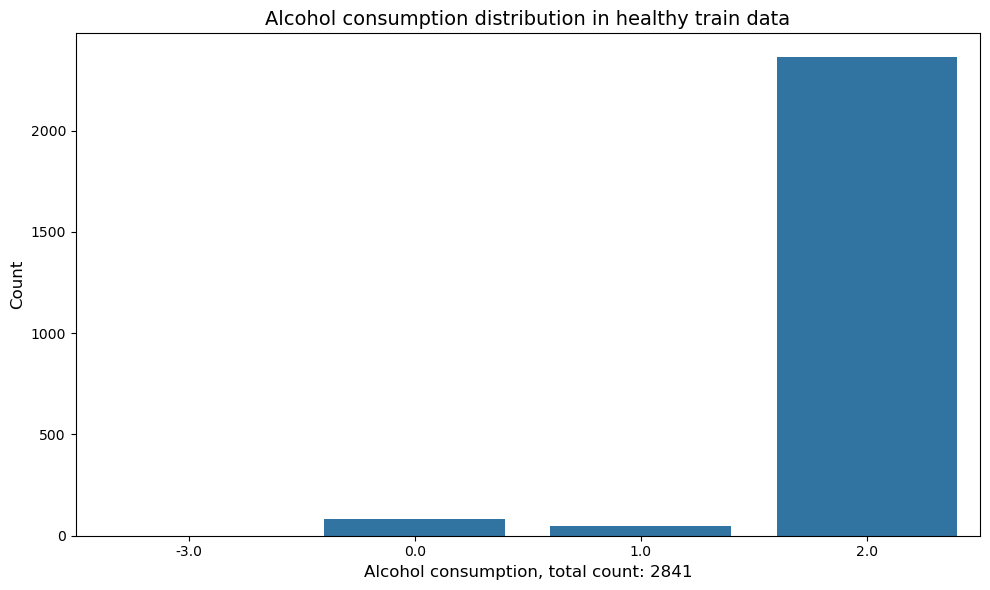

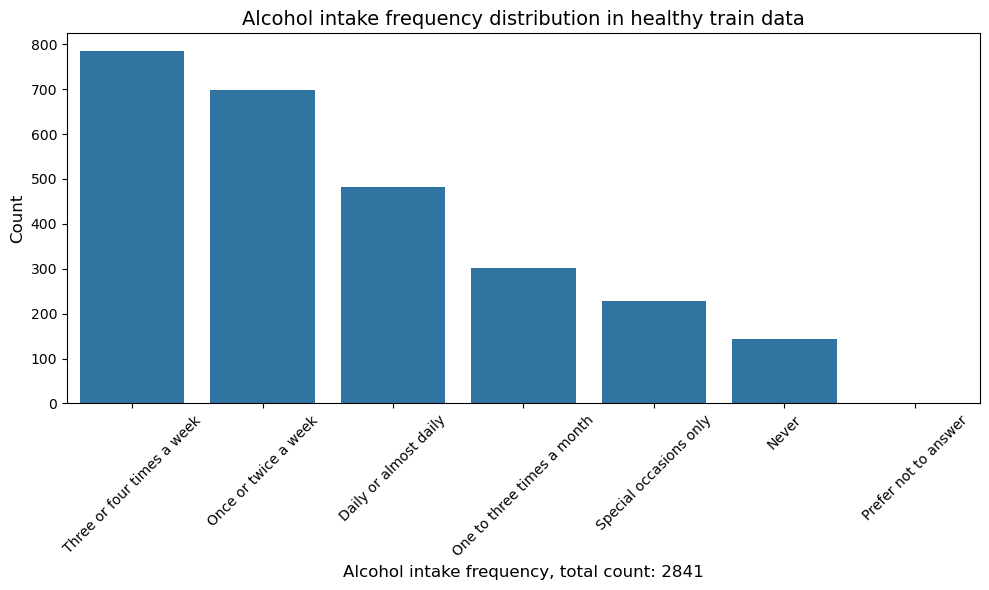

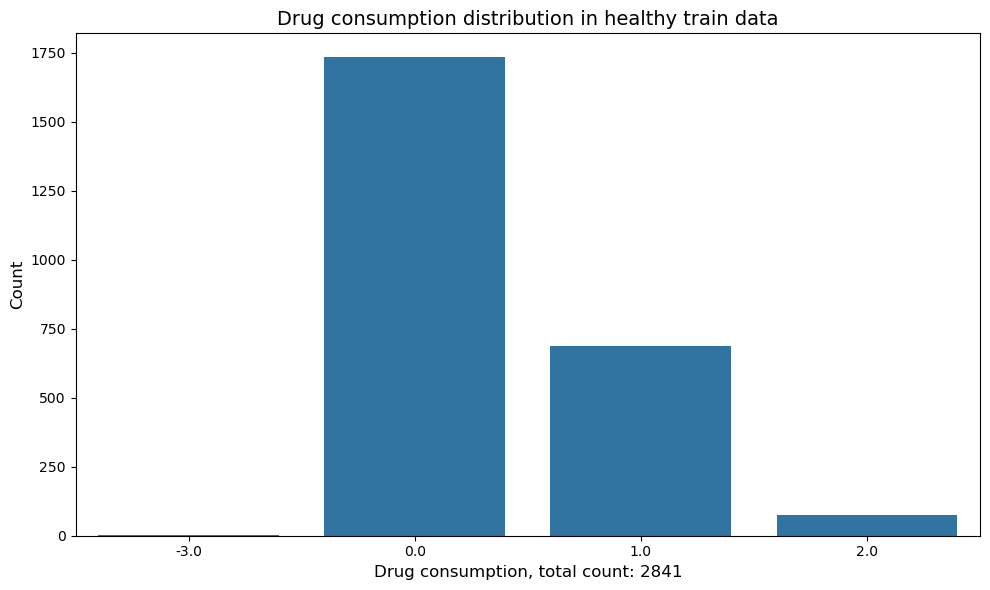

In [42]:
# plot alcohol and drug consumption
plt.figure(figsize=(10, 6))
sns.barplot(x=healthy_data_train['alcohol_consumption'].value_counts().index, y=healthy_data_train['alcohol_consumption'].value_counts().values)
plt.title('Alcohol consumption distribution in healthy train data', fontsize=14)
plt.xlabel(f'Alcohol consumption, total count: {len(healthy_data_train)}', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
# barplot with mapped labels
sns.barplot(x=healthy_data_train['alcohol_intake_frequency'].map(alc_frequency_map).value_counts().index,
            y=healthy_data_train['alcohol_intake_frequency'].map(alc_frequency_map).value_counts().values)
plt.xticks(rotation=45)
plt.title('Alcohol intake frequency distribution in healthy train data', fontsize=14)
plt.xlabel(f'Alcohol intake frequency, total count: {len(healthy_data_train)}', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=healthy_data_train['drug_use'].value_counts().index, y=healthy_data_train['drug_use'].value_counts().values)
plt.title('Drug consumption distribution in healthy train data', fontsize=14)
plt.xlabel(f'Drug consumption, total count: {len(healthy_data_train)}', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [24]:
radiomic_eids = radiomics_fat["eid"].unique().tolist()
age_eids = healthy_data_train["eid"].tolist()
# find common eids
common_eids = set(radiomic_eids) & set(age_eids)
print(f"Common eids: {len(common_eids)}")

Common eids: 524


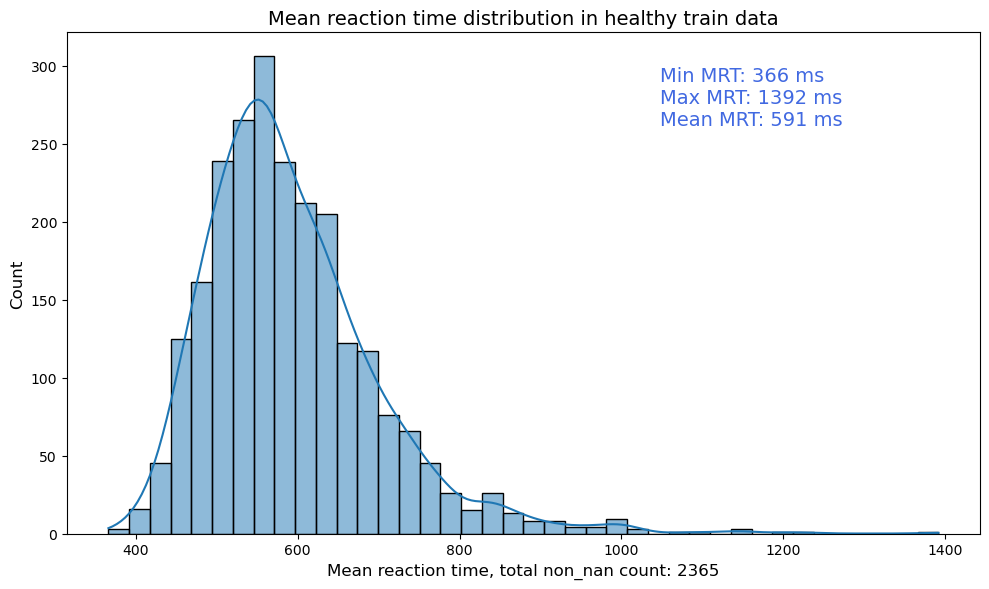

In [16]:
#healthy_data_train["mean_reaction_time"]
# plot mean reaction times
plt.figure(figsize=(10, 6))
sns.histplot(healthy_data_train['mean_reaction_time'], bins=40, kde=True)
plt.title('Mean reaction time distribution in healthy train data', fontsize=14)
plt.xlabel(f'Mean reaction time, total non_nan count: {healthy_data_train["mean_reaction_time"].count()}', fontsize=12)
plt.text(0.65, 0.87, f"Min MRT: {int(healthy_data_train['mean_reaction_time'].min())} ms\nMax MRT: {int(healthy_data_train['mean_reaction_time'].max())} ms\nMean MRT: {int(healthy_data_train['mean_reaction_time'].mean())} ms",
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14, color='royalblue')
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

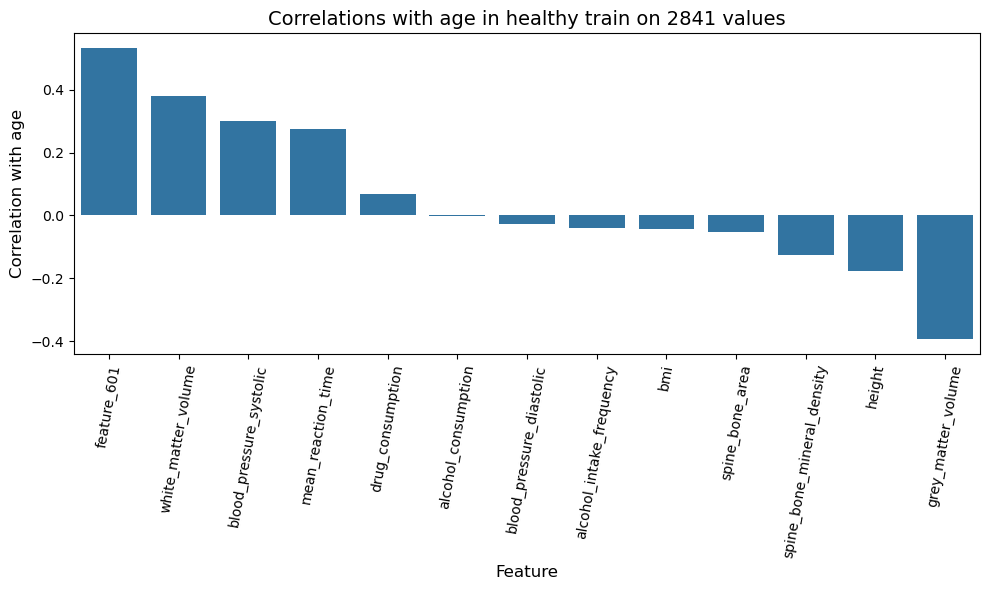

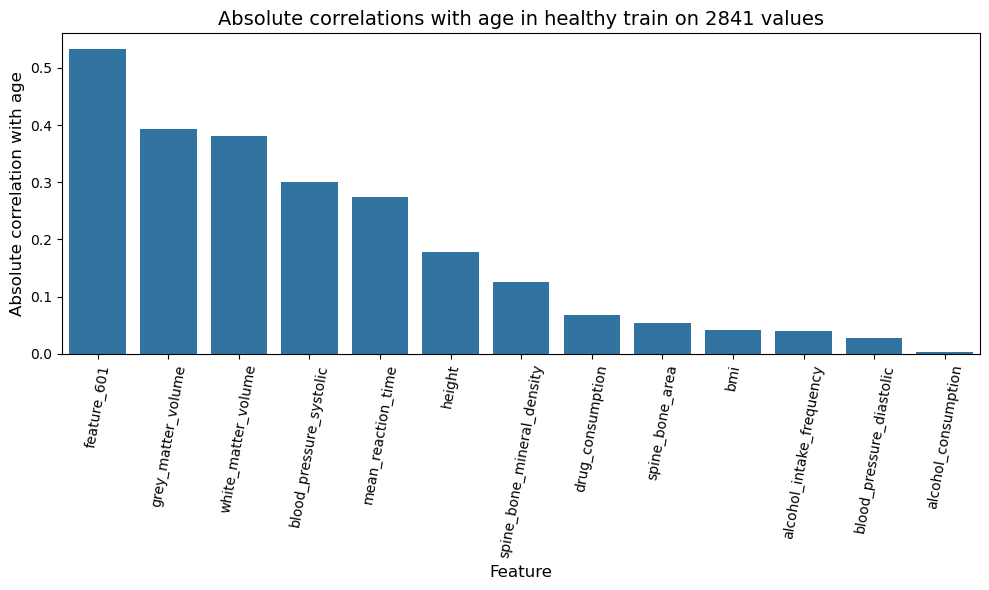

In [5]:
non_features = [col for col in healthy_data_train.columns if not col.startswith('feature_') and col not in ['eid', 'age']] + ["feature_601"]

correlations = healthy_data_train[non_features].corrwith(healthy_data_train["age"]).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=80)
plt.title(f'Correlations with age in healthy train on {len(healthy_data_train)} values', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation with age', fontsize=12)
plt.tight_layout()
plt.show()

correlations = correlations.abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=80)
plt.title(f'Absolute correlations with age in healthy train on {len(healthy_data_train)} values', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Absolute correlation with age', fontsize=12)
plt.tight_layout()
plt.show()

Total number of samples without NaN: 915
Most NaNs in a single column: 1429
Column with most NaNs: blood_pressure_diastolic (1429)
Total number of samples without NaN excluding ['blood_pressure_systolic', 'blood_pressure_diastolic']: 1405
Columns with more than 30.0% NaNs: ['blood_pressure_diastolic', 'blood_pressure_systolic', 'spine_bone_mineral_density', 'spine_bone_area', 'grey_matter_volume', 'white_matter_volume']
Correlation of gray and white matter volumes with age:
     grey_matter_volume  white_matter_volume
age           -0.393908             0.380698


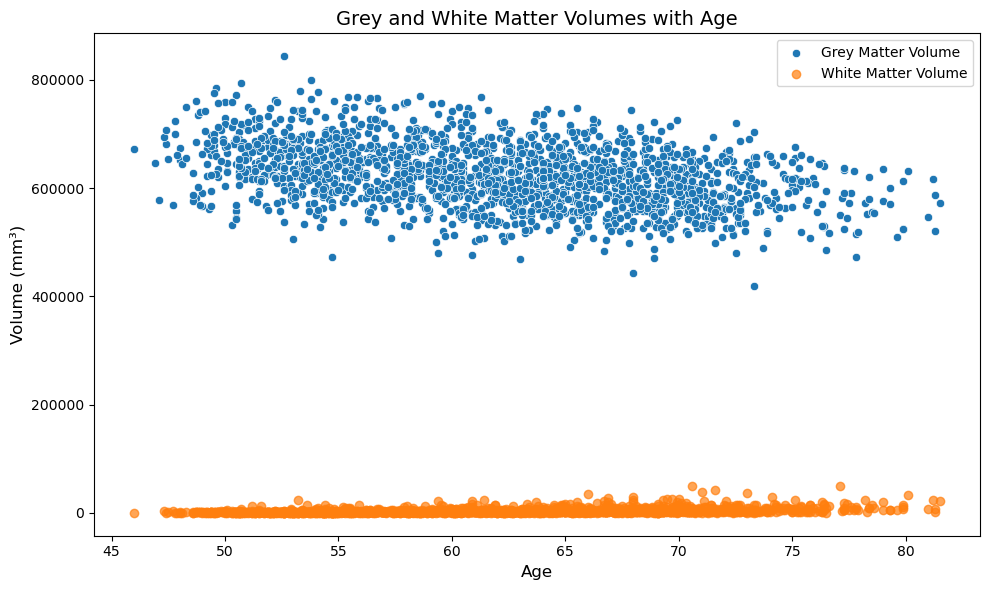

In [ ]:
# total number of samples without Nan anywhere
print(f"Total number of samples without NaN: {healthy_data_train.notna().all(axis=1).sum()}")
# most nans in a single column
print(f"Most NaNs in a single column: {healthy_data_train.isna().sum().max()}")
# column with most NaNs
print(f"Column with most NaNs: {healthy_data_train.isna().sum().idxmax()} ({healthy_data_train.isna().sum().max()})")
# number of samples without nan if excluding the column with most NaNs
exclude_col = ["blood_pressure_systolic", "blood_pressure_diastolic"]
print(f"Total number of samples without NaN excluding {exclude_col}: {healthy_data_train.drop(columns=exclude_col).notna().all(axis=1).sum()}")
# list of columns with more than n% NaNs
nan_threshold = 0.3
cols_with_many_nans = healthy_data_train.columns[healthy_data_train.isna().mean() > nan_threshold].tolist()
print(f"Columns with more than {nan_threshold * 100}% NaNs: {cols_with_many_nans}")
# correlation of gray and white matter volumes with age
gray_white_corr = healthy_data_train[['grey_matter_volume', 'white_matter_volume', 'age']].corr()
print("Correlation of gray and white matter volumes with age:")

